# Exercise Set 6: Data Structuring 2

*Afternoon, August 15, 2018*

In this Exercise Set we will continue working with the weather data you downloaded and saved in Exercise Set 4. 

> **_Note_**: to solve the bonus exercises in this exerise set you will need to apply the `.groupby()` method a few times. This has not yet been covered in the lectures (you will see it tomorrow).  
>
> `.groupby()` is a method of pandas dataframes, meaning we can call it like so: `data.groupby('colname')`. The method groups your dataset by a specified column, and applies any following changes within each of these groups. For a more detailed explanation see [this link](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm). The [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) might also be useful.

First load in the required modules and set up the plotting library:

In [39]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise Section 6.1: Weather, part 2

This section is the second part of three that analyzes NOAA data. The first part is Exercise Section 4.1, the last part is Exercise Section 7.2.

> **Ex. 6.1.1:** Load the CSV data you stored yesterday as part of Exercise Section 4.1. If you didn't manage to save the CSV file, you can use the code in [this gist](https://gist.github.com/Kristianuruplarsen/be3a14b226fc4c4d7b62c39de70307e4) to load in the NOAA data.

In [34]:
# [Answer to Ex. 6.1.1]
import pandas as pd

url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/by_year/1864.csv.gz'

df_weather = pd.read_csv(url,
                         compression='gzip',
                         header=None).iloc[:,:4]

df_weather.columns = ['station', 'datetime', 'obs_type', 'obs_value']
df_weather['obs_value'] = df_weather['obs_value'] / 10
df_select = df_weather[(df_weather.station == 'ITE00100550') & (df_weather.obs_type == 'TMAX')].copy()
df_select['TMAX_F'] = 32 + 1.8 * df_select['obs_value']
df_sorted = df_select.reset_index(drop=True).sort_values(by=['obs_value'])

> **Ex. 6.1.2:** Convert the date formatted as string to  datetime. Make a new column with the month for each observation.

In [35]:
# [Answer to Ex. 6.1.2]
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'], format='%Y%m%d')
#df_weather.head()

df_weather['month'] = df_weather['datetime'].dt.strftime('%m')
print (df_weather)

           station   datetime obs_type  obs_value month
0      ITE00100550 1864-01-01     TMAX        1.0    01
1      ITE00100550 1864-01-01     TMIN       -2.3    01
2      ITE00100550 1864-01-01     PRCP        2.5    01
3      ASN00079028 1864-01-01     PRCP        0.0    01
4      USC00064757 1864-01-01     PRCP       11.9    01
5      SF000208660 1864-01-01     PRCP        0.0    01
6      ASN00089000 1864-01-01     PRCP        0.0    01
7      SWE00100003 1864-01-01     PRCP        0.0    01
8      ASN00086071 1864-01-01     TMAX       21.4    01
9      ASN00086071 1864-01-01     TMIN       10.1    01
10     ASN00086071 1864-01-01     PRCP        0.0    01
11     USP00CA0003 1864-01-01     PRCP        0.0    01
12     USC00189674 1864-01-01     PRCP        0.0    01
13     USC00144559 1864-01-01     PRCP        0.0    01
14     USC00144559 1864-01-01     SNOW        0.0    01
15     CA006158350 1864-01-01     TMAX        1.1    01
16     CA006158350 1864-01-01     TMIN      -13.

> **Ex. 6.1.3:** Set the datetime variable as temporal index and make a timeseries plot.

> _Hint:_ for this you need to know a few methods of the pandas DataFrames and pandas Series objects. Look up `.set_index()` and `.plot()`. 

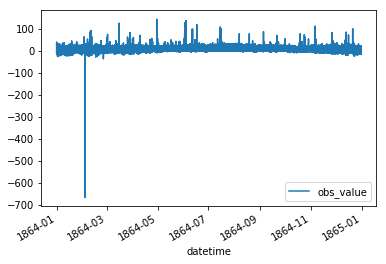

In [42]:
# [Answer to Ex. 6.1.3]
df_weather2 = df_weather.set_index('datetime')
#print(df_weather2)
df_weather2.plot(kind='line')

> **Ex. 6.1.4:** Extract the country code from the station name into a separate column.

> _Hint:_ The station column contains a GHCND ID, given to each weather station by NOAA. The format of these ID's is a 2-3 letter country code, followed by a integer identifying the specific station. A simple approach is to assume a fixed length of the country ID. A more complex way would be to use the [`re`](https://docs.python.org/2/library/re.html) module. 

In [54]:
# [Answer to Ex. 6.1.4]
import re

df_weather2['country'] = df_weather2['station'].astype(str).str[0:3]
print(df_weather2)

                station obs_type  obs_value month new_col country
datetime                                                         
1864-01-01  ITE00100550     TMAX        1.0    01       I     ITE
1864-01-01  ITE00100550     TMIN       -2.3    01       I     ITE
1864-01-01  ITE00100550     PRCP        2.5    01       I     ITE
1864-01-01  ASN00079028     PRCP        0.0    01       A     ASN
1864-01-01  USC00064757     PRCP       11.9    01       U     USC
1864-01-01  SF000208660     PRCP        0.0    01       S     SF0
1864-01-01  ASN00089000     PRCP        0.0    01       A     ASN
1864-01-01  SWE00100003     PRCP        0.0    01       S     SWE
1864-01-01  ASN00086071     TMAX       21.4    01       A     ASN
1864-01-01  ASN00086071     TMIN       10.1    01       A     ASN
1864-01-01  ASN00086071     PRCP        0.0    01       A     ASN
1864-01-01  USP00CA0003     PRCP        0.0    01       U     USP
1864-01-01  USC00189674     PRCP        0.0    01       U     USC
1864-01-01

> **Ex. 6.1.5:** Make a function that downloads and formats the weather data according to previous exercises in Exercise Section 4.1, 6.1. You should use data for ALL stations but still only select maximal temperature. _Bonus:_ To validate that your function works plot the temperature curve for each country in the same window. Use `plt.legend()` to add a legend. 

In [ ]:
# [Answer to Ex. 6.1.5]


##  Exercise Section 6.2: 

In this section we will use [this dataset](https://archive.ics.uci.edu/ml/datasets/Adult) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html) to practice some basic operations on pandas dataframes. 


> **Ex. 6.2.1:** This link `'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'` leads to a comma-separated file with income data from a US census. Load the data into a pandas dataframe and show the 25th to 35th row.

> _Hint #1:_ There are no column names in the dataset. Use the list `['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']` as names. 

> _Hint #2:_ When you read in the csv, you might find that pandas includes whitespace in all of the cells. To get around this include the argument `skipinitialspace = True` to `read_csv()`. 

In [62]:
# [Answer to Ex. 6.2.1]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df_uci = pd.read_csv(url, header=None, skipinitialspace = True)
columns_name = ['age','workclass', 'fnlwgt', 'educ', 'educ_num', 'marital_status', 'occupation','relationship', 'race', 'sex','capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage']
df_uci.columns = columns_name
print(df_uci)

       age         workclass  fnlwgt          educ  educ_num  \
0       39         State-gov   77516     Bachelors        13   
1       50  Self-emp-not-inc   83311     Bachelors        13   
2       38           Private  215646       HS-grad         9   
3       53           Private  234721          11th         7   
4       28           Private  338409     Bachelors        13   
5       37           Private  284582       Masters        14   
6       49           Private  160187           9th         5   
7       52  Self-emp-not-inc  209642       HS-grad         9   
8       31           Private   45781       Masters        14   
9       42           Private  159449     Bachelors        13   
10      37           Private  280464  Some-college        10   
11      30         State-gov  141297     Bachelors        13   
12      23           Private  122272     Bachelors        13   
13      32           Private  205019    Assoc-acdm        12   
14      40           Private  121772    

> **Ex. 6.2.2:** What is the missing value sign in this dataset? Replace all missing values with NA's understood by pandas. Then proceed to drop all rows containing any missing values with the `dropna` method. How many rows are removed in this operation?

> _Hint 1:_ if this doesn't work as expected you might want to take a look at the hint for 6.2.1 again.
 
> _Hint 2:_ The NaN method from NumPy might be useful

In [66]:
# [Answer to Ex. 6.2.2]
import numpy as np
df_uci.replace('?', np.NaN)

,age,workclass,fnlwgt,educ,educ_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


> **Ex. 6.2.3:** (_Bonus_) Is there any evidence of a gender-wage-gap in the data? Create a table showing the percentage of men and women earning more than 50K a year.

In [ ]:
# [Answer to Ex. 6.2.3]

> **Ex. 6.2.4:** (_Bonus_) Group the data by years of education (`educ_num`) and marital status. Now plot the share of individuals who earn more than 50K for the two groups 'Divorced' and 'Married-civ-spouse' (normal marriage). Your final result should look like this: 

![](examplefig.png)

> _Hint:_ the `.query()` method is extremely useful for filtering data.

In [ ]:
# [Answer to Ex. 6.2.4]